# Applying a Decision Tree model for regression

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, PredictionErrorDisplay

## Reading data

In [27]:
DATA = pd.read_csv("Log_FinalData.csv", index_col="Unnamed: 0")
DATA

,racePctAsian,indianPerCap,PctEmplProfServ,PctOccupMgmtProf,PctKids2Par,PctWorkMom,PctImmigRec5,PctRecImmig10,PctHousOwnOcc,PctHousNoPhone,PctWOFullPlumb,OwnOccHiQuart,RentHighQ,PctForeignBorn,PctSameCity85,PctUsePubTrans,ViolentCrimesPerPop
0,0.049218,0.103804,0.149219,0.181844,0.201397,0.245513,0.103804,0.033424,0.181844,0.056905,0.025306,0.071882,0.139879,0.049218,0.178977,0.079181,0.079181
1,0.161368,0.064458,0.060698,0.133539,0.167317,0.184691,0.209515,0.089905,0.093422,0.064458,0.000000,0.082785,0.146128,0.082785,0.204120,0.161368,0.222716
2,0.068186,0.029384,0.110590,0.120574,0.158362,0.222716,0.025306,0.021189,0.149219,0.167317,0.161368,0.064458,0.103804,0.056905,0.222716,0.008600,0.155336
3,0.049218,0.064458,0.161368,0.143015,0.187521,0.269513,0.079181,0.045323,0.292256,0.045323,0.045323,0.075547,0.247973,0.075547,0.214844,0.107210,0.049218
4,0.037426,0.000000,0.139879,0.164353,0.281033,0.204120,0.029384,0.021189,0.271842,0.021189,0.056905,0.113943,0.139879,0.045323,0.206826,0.008600,0.012837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.049218,0.000000,0.225309,0.230449,0.225309,0.238046,0.149219,0.071882,0.190332,0.029384,0.037426,0.103804,0.149219,0.086360,0.170262,0.021189,0.037426
1990,0.262451,0.071882,0.149219,0.093422,0.212188,0.146128,0.209515,0.206826,0.086360,0.068186,0.136721,0.133539,0.206826,0.184691,0.041393,0.079181,0.161368
1991,0.017033,0.075547,0.146128,0.120574,0.152288,0.164353,0.068186,0.049218,0.136721,0.117271,0.110590,0.110590,0.143015,0.096910,0.252853,0.071882,0.089905
1992,0.086360,0.079181,0.195900,0.170262,0.217484,0.212188,0.164353,0.139879,0.123852,0.041393,0.127105,0.167317,0.243038,0.161368,0.201397,0.123852,0.075547


## Creating test and train sets for model fitting

In [28]:
X = DATA.loc[:, DATA.columns[:-2]]
Y = DATA.loc[:, DATA.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
X_train.size, X_test.size

(23925, 5985)

## Defining the optimum Decision Tree Regressor
The optimization will be made by changing the number of samples per Split and Leaf and also the max number of levels for
the depth of the tree.

In [29]:
Results_Nums_SplitLeaf = []
MinR2 = 0.0
Range_Leaf_Split = range(1, 21)

for numSplit in Range_Leaf_Split:
    for numLeaf in Range_Leaf_Split:
        DT_Regressor = DecisionTreeRegressor(min_samples_split=numSplit, min_samples_leaf=numLeaf,
                                            random_state=42)
        DT_Regressor.fit(X_train, Y_train)
        Y_hat = DT_Regressor.predict(X_test)

        R2_Score = r2_score(Y_test, Y_hat)
                    
        if R2_Score > MinR2:
            MinR2 = R2_Score
            MinSampleSplit = numSplit
            MinSampleLeaf = numLeaf

print(f"{MinSampleLeaf=}")
print(f"{MinSampleSplit=}")
print(f"{MinR2=}")

MinSampleLeaf=20
MinSampleSplit=1
MinR2=0.548509953242482


## Using optimal number of samples for leafs and splits

In [30]:
MinSampleLeaf = 20
MinSampleSplit = 1

DT_Regressor = DecisionTreeRegressor(min_samples_split=MinSampleSplit, min_samples_leaf=MinSampleLeaf,
                                     random_state=42)
DT_Regressor.fit(X_train, Y_train)
Y_hat = DT_Regressor.predict(X_test)

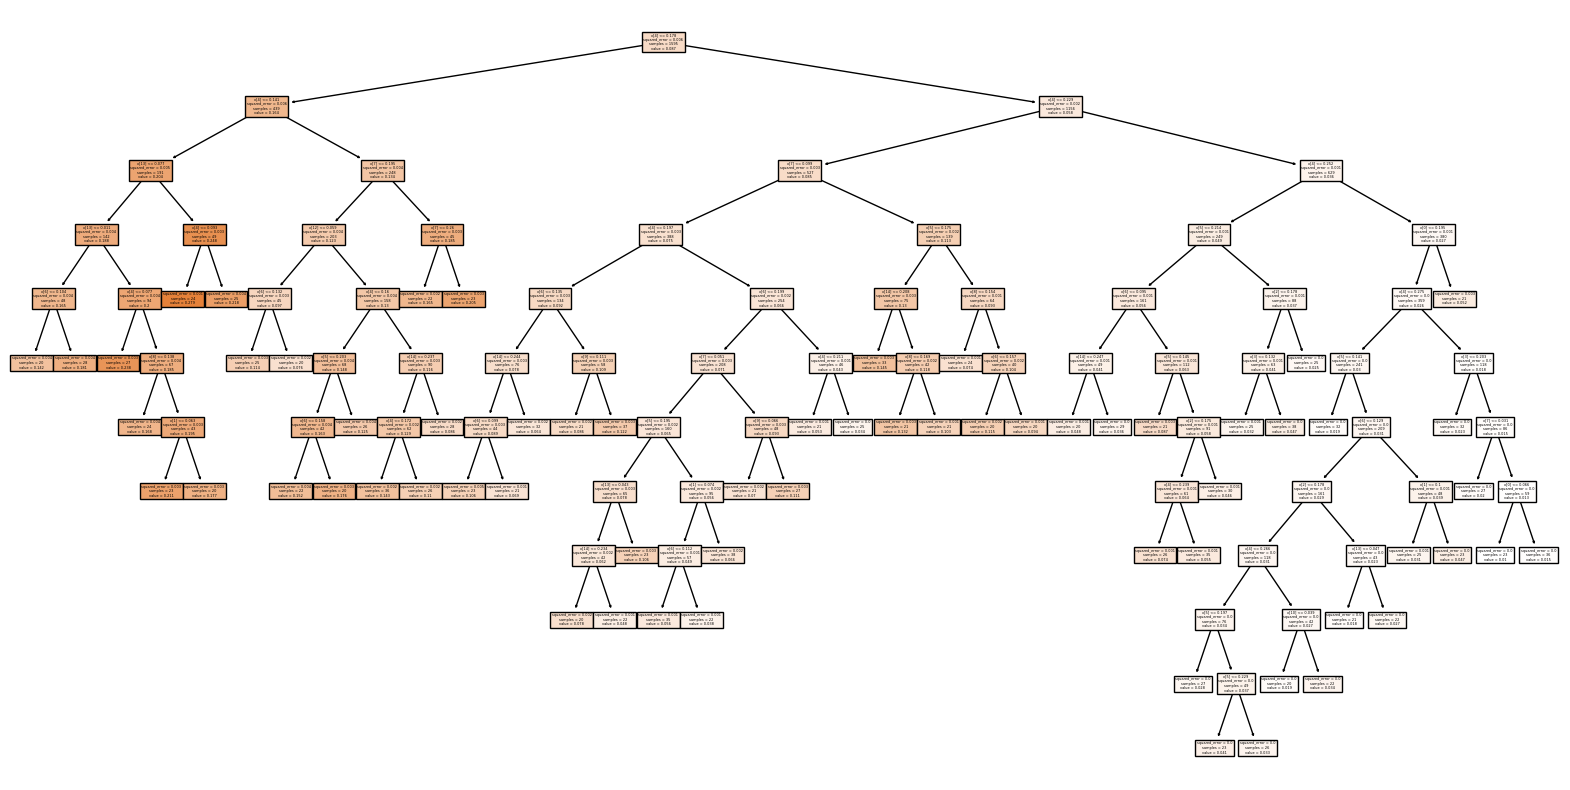

In [31]:
FiguraTree, SubPlot = plt.subplots(ncols=1, nrows=1, figsize=(20,10))

plot_tree(DT_Regressor, filled=True, ax=SubPlot)
plt.show()

## Obtaining scores for Decision Tree model

In [32]:
MS2_E = mean_squared_error(Y_test, Y_hat)
MA_E = mean_absolute_error(Y_test, Y_hat)
R2 = r2_score(Y_test, Y_hat)

print(f"{MS2_E=} ")
print(f"{MA_E=} ")
print(f"{R2=} ")

MS2_E=0.0022526073191753704 
MA_E=0.03418020628822776 
R2=0.548509953242482 


## Visualize Prediction-Error plot

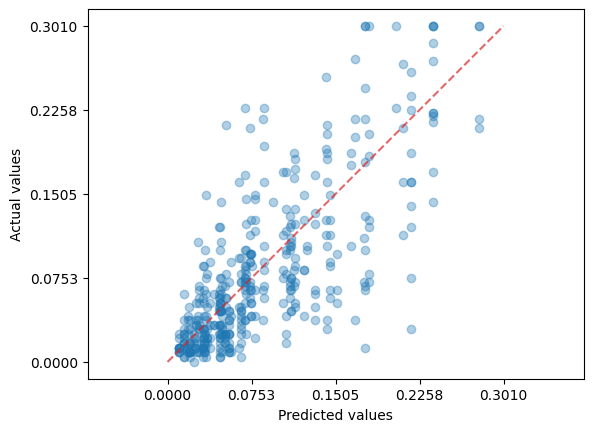

In [33]:
PredictionErrorDisplay.from_predictions(y_true=Y_test, y_pred=Y_hat, kind="actual_vs_predicted",
                       scatter_kwargs={"alpha":0.35, "color":"tab:blue"},
                       line_kwargs={"color":"tab:red"})